In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# VE 

In [73]:
def clean_data(path, folder_name):
    dfs = []  # List to store individual DataFrames
    # Loop through each file in the folder
    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            file_path = os.path.join(path, filename)
            # Read the CSV file
            df = pd.read_csv(file_path, error_bad_lines=False) 
            header_row = df.columns
            new_header = [f'{a}_{b}' for a, b in zip(header_row, df.iloc[0])]
            df.columns = new_header
            # Remove the first row
            df = df.iloc[1:]
            # Convert 'System_Date' column to string
            df['System_Date'] = df['System_Date'].astype(str)
            # Concatenate 'System_Date' and 'System.1_Time' columns
            combined_datetime = df['System_Date'] + ' ' + df['System.1_Time']
            # Convert combined string to datetime
            df['System_Date_Time'] = pd.to_datetime(combined_datetime, errors='coerce')
            # Remove rows with NaT values
            df_cleaned = df.dropna(subset=['System_Date_Time'])
            # Add a column for the file name
            df_cleaned['file_name'] = filename
            df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
            df_reordered = df_cleaned[['file_name', 'System_Date_Time'] + [col for col in df_cleaned.columns if col not in ['file_name', 'System_Date_Time', 'workload_type']]]
            # Append the cleaned DataFrame to the list
            dfs.append(df_reordered)
    
    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    # Add 'workload_number' column based on folder name
    workload_numbers = {'himeno': 1, 'ior': 2, 'stream': 3, 'b_eff': 4, 'mini': 5, 'intel': 6, 'hpl': 7}
    result_df['workload_number'] = workload_numbers[folder_name]
    result_df['workload_name'] = folder_name
    
    return result_df

# Folder paths and names
folder_paths = {'himeno': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VE/himeno',
                'ior': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VE/ior',
                'stream': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VE/stream',
                'b_eff': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VE/b_eff',
                'mini': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VE/mini',
                'intel': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VE/intel',
                'hpl': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VE/hpl'}

# Create an empty list to store DataFrames for each folder
all_dfs = []

# Iterate over folder paths and names
for folder_name, folder_path in folder_paths.items():
    # Clean data and append to the list
    df = clean_data(folder_path, folder_name)
    all_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df_ve = pd.concat(all_dfs, ignore_index=True)

# Display the final DataFrame
print(final_df_ve)


/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line 15: expected 510 fields, saw 511
Skipping line 27: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 511
Skipping line 52: expected 510 fields, saw 511
Skipping line 58: expected 510 fields, saw 511
Skipping line 61: expected 510 fields, saw 511
Skipping line 64: expected 510 fields, saw 511
Skipping line 73: expected 510 fields, saw 511
Skipping line 89: expected 510 fields, saw 511
Skipping line 107: expected 510 fields, saw 513
Skipping line 114: expected 510 fields, saw 511
Skipping line 120: expected 510 fields, saw 511
Skipping line 126: expected 510 fields, saw 512
Skipping line 129: expected 510 fields, saw 511
Skipping line 132: expected 510 fields, saw 511
Skipping lin

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 12: expected 510 fields, saw 512
Skipping lin

Skipping line 6: expected 510 fields, saw 511
Skipping line 9: expected 510 fields, saw 513
Skipping line 12: expected 510 fields, saw 513
Skipping line 21: expected 510 fields, saw 512
Skipping line 24: expected 510 fields, saw 513
Skipping line 27: expected 510 fields, saw 511
Skipping line 36: expected 510 fields, saw 512
Skipping line 39: expected 510 fields, saw 512
Skipping line 43: expected 510 fields, saw 513
Skipping line 49: expected 510 fields, saw 511
Skipping line 52: expected 510 fields, saw 512
Skipping line 61: expected 510 fields, saw 511
Skipping line 64: expected 510 fields, saw 511
Skipping line 67: expected 510 fields, saw 511
Skipping line 70: expected 510 fields, saw 511
Skipping line 73: expected 510 fields, saw 511
Skipping line 78: expected 510 fields, saw 511
Skipping line 81: expected 510 fields, saw 511
Skipping line 84: expected 510 fields, saw 511
Skipping line 90: expected 510 fields, saw 511
Skipping line 93: expected 510 fields, saw 513
Skipping line 9

Skipping line 6: expected 510 fields, saw 511
Skipping line 15: expected 510 fields, saw 512
Skipping line 18: expected 510 fields, saw 511
Skipping line 21: expected 510 fields, saw 511
Skipping line 33: expected 510 fields, saw 511
Skipping line 36: expected 510 fields, saw 511
Skipping line 55: expected 510 fields, saw 512
Skipping line 58: expected 510 fields, saw 511
Skipping line 61: expected 510 fields, saw 511
Skipping line 77: expected 510 fields, saw 511
Skipping line 80: expected 510 fields, saw 511
Skipping line 83: expected 510 fields, saw 511
Skipping line 86: expected 510 fields, saw 513
Skipping line 89: expected 510 fields, saw 511
Skipping line 92: expected 510 fields, saw 511
Skipping line 95: expected 510 fields, saw 513
Skipping line 98: expected 510 fields, saw 511
Skipping line 101: expected 510 fields, saw 511
Skipping line 104: expected 510 fields, saw 511
Skipping line 107: expected 510 fields, saw 511
Skipping line 110: expected 510 fields, saw 512
Skipping l

/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 513
Skipping line 12: expected 510 fields, saw 512
Skipping line 15: expected 510 fields, saw 511
Skipping line 21: expected 510 fields, saw 513
Skipping line 24: expected 510 fields, saw 512
Skipping line 27: expected 510 fields, saw 513
Skipping line 30: expected 510 fields, saw 512
Skipping line 33: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 513
Skipping line 43: expected 510 fields, saw 513
Skipping line 49: expected 510 fields, saw 513
Skipping line 52: expected 510 fields, saw 513
Skipping line 55: expected 510 fields, saw 512
Skipping line 58: expected 510 fields, saw 512
Skipping line 64: expected 510 fields, saw 511
Skipping line 70: expected 510 fields, saw 511
Skipping line 73: 

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 511
Skipping line

/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 12: expected 510 fields, saw 511
Skipping line 43: expected 510 fields, saw 511
Skipping line 46: expected 510 fields, saw 513
Skipping line 52: expected 510 fields, saw 511
Skipping line 61: expected 510 fields, saw 511
Skipping line 67: expected 510 fields, saw 512
Skipping line 70: expected 510 fields, saw 516
Skipping line 76: expected 510 fields, saw 512
Skipping line 83: expected 510 fields, saw 511
Skipping line 86: expected 510 fields, saw 511
Skipping line 89: expected 510 fields, saw 521
Skipping line 98: expected 510 fields, saw 511
Skipping line 101: expected 510 fields, saw 511
Skipping line 104: expected 510 fields, saw 511
Skipping line 110: expected 510 fields, saw 511
Skipping line 120: expected 510 fields, saw 511
Skipping line

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 511
Skipping line

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The e

/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 512
Skipping line 15: expected 510 fields, saw 511
Skipping line 18: expected 510 fields, saw 511
Skipping line 27: expected 510 fields, saw 511
Skipping line 30: expected 510 fields, saw 512
Skipping line 36: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 511
Skipping line 95: expected 510 fields, saw 511
Skipping line 98: expected 510 fields, saw 511
Skipping line 104: expected 510 fields, saw 511
Skipping line 110: expected 510 fields, saw 511
Skipping line 120: expected 510 fields, saw 513
Skipping line 123: expected 510 fields, saw 511
Skipping line 126: expected 510 fields, saw 512
Skipping line 129: expected 510 fields, saw 511
Skipping line 132: expected 510 fields, saw 511
Skipping li

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 21: expected 510 fields, saw 512
Skipping lin

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 512
Skipping line

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 512
Skipping line

Skipping line 6: expected 510 fields, saw 512
Skipping line 9: expected 510 fields, saw 511
Skipping line 12: expected 510 fields, saw 512
Skipping line 18: expected 510 fields, saw 512
Skipping line 21: expected 510 fields, saw 511
Skipping line 24: expected 510 fields, saw 512
Skipping line 27: expected 510 fields, saw 513
Skipping line 30: expected 510 fields, saw 511
Skipping line 33: expected 510 fields, saw 511
Skipping line 36: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 511
Skipping line 46: expected 510 fields, saw 511
Skipping line 58: expected 510 fields, saw 511
Skipping line 67: expected 510 fields, saw 512
Skipping line 80: expected 510 fields, saw 512
Skipping line 86: expected 510 fields, saw 511
Skipping line 89: expected 510 fields, saw 512
Skipping line 92: expected 510 fields, saw 513
Skipping line 98: expected 510 fields, saw 511
Skipping line 104: expected 510 fields, saw 511
Skipping line 113: expected 510 fields, saw 511
Skipping line

Skipping line 6: expected 510 fields, saw 511
Skipping line 9: expected 510 fields, saw 511
Skipping line 18: expected 510 fields, saw 511
Skipping line 24: expected 510 fields, saw 512
Skipping line 27: expected 510 fields, saw 512
Skipping line 30: expected 510 fields, saw 511
Skipping line 36: expected 510 fields, saw 511
Skipping line 46: expected 510 fields, saw 511
Skipping line 52: expected 510 fields, saw 511
Skipping line 61: expected 510 fields, saw 511
Skipping line 67: expected 510 fields, saw 513
Skipping line 70: expected 510 fields, saw 511
Skipping line 73: expected 510 fields, saw 512
Skipping line 83: expected 510 fields, saw 511
Skipping line 86: expected 510 fields, saw 511
Skipping line 92: expected 510 fields, saw 511
Skipping line 98: expected 510 fields, saw 511
Skipping line 101: expected 510 fields, saw 511
Skipping line 104: expected 510 fields, saw 511
Skipping line 107: expected 510 fields, saw 511
Skipping line 113: expected 510 fields, saw 1020
Skipping l

Skipping line 6: expected 510 fields, saw 511
Skipping line 9: expected 510 fields, saw 513
Skipping line 12: expected 510 fields, saw 511
Skipping line 15: expected 510 fields, saw 512
Skipping line 18: expected 510 fields, saw 512
Skipping line 24: expected 510 fields, saw 511
Skipping line 30: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 512
Skipping line 46: expected 510 fields, saw 515
Skipping line 49: expected 510 fields, saw 512
Skipping line 52: expected 510 fields, saw 511
Skipping line 55: expected 510 fields, saw 512
Skipping line 61: expected 510 fields, saw 511
Skipping line 67: expected 510 fields, saw 513
Skipping line 70: expected 510 fields, saw 511
Skipping line 76: expected 510 fields, saw 511
Skipping line 80: expected 510 fields, saw 511
Skipping line 83: expected 510 fields, saw 512
Skipping line 89: expected 510 fields, saw 513
Skipping line 95: expected 510 fields, saw 512
Skipping line 98: expected 510 fields, saw 511
Skipping line 1

Skipping line 15: expected 510 fields, saw 511
Skipping line 18: expected 510 fields, saw 512
Skipping line 27: expected 510 fields, saw 512
Skipping line 33: expected 510 fields, saw 511
Skipping line 36: expected 510 fields, saw 512
Skipping line 39: expected 510 fields, saw 511
Skipping line 43: expected 510 fields, saw 511
Skipping line 46: expected 510 fields, saw 512
Skipping line 49: expected 510 fields, saw 511
Skipping line 55: expected 510 fields, saw 513
Skipping line 61: expected 510 fields, saw 511
Skipping line 64: expected 510 fields, saw 511
Skipping line 67: expected 510 fields, saw 511
Skipping line 70: expected 510 fields, saw 512
Skipping line 73: expected 510 fields, saw 512
Skipping line 76: expected 510 fields, saw 511
Skipping line 80: expected 510 fields, saw 511
Skipping line 89: expected 510 fields, saw 511
Skipping line 92: expected 510 fields, saw 511
Skipping line 95: expected 510 fields, saw 512
Skipping line 98: expected 510 fields, saw 511
Skipping line

Skipping line 12: expected 510 fields, saw 512
Skipping line 15: expected 510 fields, saw 511
Skipping line 21: expected 510 fields, saw 513
Skipping line 30: expected 510 fields, saw 511
Skipping line 33: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 511
Skipping line 43: expected 510 fields, saw 511
Skipping line 49: expected 510 fields, saw 511
Skipping line 61: expected 510 fields, saw 511
Skipping line 123: expected 510 fields, saw 511
Skipping line 135: expected 510 fields, saw 511
Skipping line 138: expected 510 fields, saw 511
Skipping line 144: expected 510 fields, saw 511
Skipping line 147: expected 510 fields, saw 512
Skipping line 154: expected 510 fields, saw 511
Skipping line 157: expected 510 fields, saw 512
Skipping line 166: expected 510 fields, saw 511
Skipping line 169: expected 510 fields, saw 511
Skipping line 178: expected 510 fields, saw 512
Skipping line 206: expected 510 fields, saw 512
Skipping line 209: expected 510 fields, saw 511
S

Skipping line 24: expected 510 fields, saw 512
Skipping line 30: expected 510 fields, saw 512
Skipping line 33: expected 510 fields, saw 512
Skipping line 36: expected 510 fields, saw 512
Skipping line 39: expected 510 fields, saw 512
Skipping line 46: expected 510 fields, saw 511
Skipping line 49: expected 510 fields, saw 511
Skipping line 55: expected 510 fields, saw 511
Skipping line 58: expected 510 fields, saw 511
Skipping line 61: expected 510 fields, saw 511
Skipping line 70: expected 510 fields, saw 512
Skipping line 73: expected 510 fields, saw 511
Skipping line 76: expected 510 fields, saw 511
Skipping line 80: expected 510 fields, saw 511
Skipping line 83: expected 510 fields, saw 511
Skipping line 89: expected 510 fields, saw 514
Skipping line 92: expected 510 fields, saw 511
Skipping line 95: expected 510 fields, saw 513
Skipping line 98: expected 510 fields, saw 511
Skipping line 101: expected 510 fields, saw 511
Skipping line 104: expected 510 fields, saw 512
Skipping li

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 15: expected 510 fields, saw 511
Skipping lin

Skipping line 12: expected 510 fields, saw 511
Skipping line 15: expected 510 fields, saw 511
Skipping line 33: expected 510 fields, saw 511
Skipping line 49: expected 510 fields, saw 511
Skipping line 61: expected 510 fields, saw 511
Skipping line 64: expected 510 fields, saw 511
Skipping line 70: expected 510 fields, saw 512
Skipping line 117: expected 510 fields, saw 511
Skipping line 120: expected 510 fields, saw 511
Skipping line 126: expected 510 fields, saw 511
Skipping line 129: expected 510 fields, saw 511
Skipping line 135: expected 510 fields, saw 511
Skipping line 138: expected 510 fields, saw 511
Skipping line 141: expected 510 fields, saw 511
Skipping line 144: expected 510 fields, saw 511
Skipping line 147: expected 510 fields, saw 511
Skipping line 150: expected 510 fields, saw 511
Skipping line 154: expected 510 fields, saw 511
Skipping line 157: expected 510 fields, saw 512
Skipping line 160: expected 510 fields, saw 511
Skipping line 166: expected 510 fields, saw 511

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 512
Skipping line

Skipping line 6: expected 510 fields, saw 511
Skipping line 12: expected 510 fields, saw 511
Skipping line 15: expected 510 fields, saw 511
Skipping line 18: expected 510 fields, saw 511
Skipping line 27: expected 510 fields, saw 511
Skipping line 30: expected 510 fields, saw 511
Skipping line 33: expected 510 fields, saw 511
Skipping line 36: expected 510 fields, saw 512
Skipping line 39: expected 510 fields, saw 512
Skipping line 55: expected 510 fields, saw 511
Skipping line 70: expected 510 fields, saw 512
Skipping line 73: expected 510 fields, saw 511
Skipping line 76: expected 510 fields, saw 513
Skipping line 83: expected 510 fields, saw 512
Skipping line 104: expected 510 fields, saw 512
Skipping line 107: expected 510 fields, saw 511
Skipping line 117: expected 510 fields, saw 511
Skipping line 123: expected 510 fields, saw 511
Skipping line 126: expected 510 fields, saw 513
Skipping line 135: expected 510 fields, saw 512
Skipping line 138: expected 510 fields, saw 511
Skippin

/tmp/ipykernel_645585/2362058717.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/2362058717.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 18: expected 510 fields, saw 511
Skipping lin

Skipping line 6: expected 510 fields, saw 511
Skipping line 9: expected 510 fields, saw 511
Skipping line 15: expected 510 fields, saw 511
Skipping line 21: expected 510 fields, saw 511
Skipping line 24: expected 510 fields, saw 511
Skipping line 27: expected 510 fields, saw 511
Skipping line 30: expected 510 fields, saw 511
Skipping line 36: expected 510 fields, saw 512
Skipping line 46: expected 510 fields, saw 511
Skipping line 52: expected 510 fields, saw 511
Skipping line 61: expected 510 fields, saw 511
Skipping line 64: expected 510 fields, saw 512
Skipping line 70: expected 510 fields, saw 511
Skipping line 73: expected 510 fields, saw 511
Skipping line 76: expected 510 fields, saw 511
Skipping line 79: expected 510 fields, saw 511
Skipping line 86: expected 510 fields, saw 511
Skipping line 89: expected 510 fields, saw 512
Skipping line 95: expected 510 fields, saw 511
Skipping line 101: expected 510 fields, saw 511
Skipping line 113: expected 510 fields, saw 511
Skipping line

/tmp/ipykernel_645585/2362058717.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 15: expected 510 fields, saw 511
Skipping line 18: expected 510 fields, saw 511
Skipping line 21: expected 510 fields, saw 511
Skipping line 24: expected 510 fields, saw 512
Skipping line 27: expected 510 fields, saw 511
Skipping line 30: expected 510 fields, saw 512
Skipping line 33: expected 510 fields, saw 513
Skipping line 39: expected 510 fields, saw 511
Skipping line 42: expected 510 fields, saw 512
Skipping line 46: expected 510 fields, saw 512
Skipping line 49: expected 510 fields, saw 512
Skipping line 55: expected 510 fields, saw 512
Skipping line 61: expected 510 fields, saw 511
Skipping line 70: expected 510 fields, saw 511
Skipping line 73: expected 510 fields, saw 511
Skipping line 76: expected 510 fields, saw 512
Skipping line 79:

             file_name            System_Date_Time System.2_EXEC System.3_IPC  \
0      ve_Himeno_0.csv  2024-03-15 11:34:17.191000          0.02         0.56   
1      ve_Himeno_0.csv  2024-03-15 11:34:17.293000          0.02         0.46   
2      ve_Himeno_0.csv  2024-03-15 11:34:17.383000          0.02         0.50   
3      ve_Himeno_0.csv  2024-03-15 11:34:17.583000          0.01         0.57   
4      ve_Himeno_0.csv  2024-03-15 11:34:17.683000          0.01         0.66   
...                ...                         ...           ...          ...   
33876    ve_HPL_10.csv  2024-03-15 14:33:11.736000          0.02         0.69   
33877    ve_HPL_10.csv  2024-03-15 14:33:11.836000          0.01         0.67   
33878    ve_HPL_10.csv  2024-03-15 14:33:12.037000          0.01         0.74   
33879    ve_HPL_10.csv  2024-03-15 14:33:12.030000          0.01         0.70   
33880    ve_HPL_10.csv  2024-03-15 14:33:12.133000          0.01         0.60   

      System.4_FREQ System.

In [74]:
final_df_ve.drop(['file_name'], axis=1, inplace=True)
final_df_ve.to_csv('ve_solo.csv', index=False)
final_df_ve

System_Date_Time System.2_EXEC System.3_IPC System.4_FREQ  \
0      2024-03-15 11:34:17.191000          0.02         0.56          0.03   
1      2024-03-15 11:34:17.293000          0.02         0.46          0.05   
2      2024-03-15 11:34:17.383000          0.02         0.50          0.04   
3      2024-03-15 11:34:17.583000          0.01         0.57          0.02   
4      2024-03-15 11:34:17.683000          0.01         0.66          0.02   
...                           ...           ...          ...           ...   
33876  2024-03-15 14:33:11.736000          0.02         0.69          0.03   
33877  2024-03-15 14:33:11.836000          0.01         0.67          0.01   
33878  2024-03-15 14:33:12.037000          0.01         0.74          0.01   
33879  2024-03-15 14:33:12.030000          0.01         0.70          0.01   
33880  2024-03-15 14:33:12.133000          0.01         0.60          0.02   

      System.5_AFREQ System.6_L3MISS System.7_L2MISS System.8_L3HIT  \
0               1.00            0.02            0.10           0.76   
1               1.00            0.02            0.09           0.71   
2               1.00            0.02            0.10           0.78   
3               1.00            0.02            0.10           0.71   
4               1.00            0.02            0.10           0.77   
...              ...             ...             ...            ...   
33876           1.00            0.03            0.13           0.52   
33877           0.88            0.01            0.04           0.58   
33878           0.85            0.03            0.05           0.33   
33879           0.88            0.02            0.04           0.51   
33880           0.90            0.02            0.06           0.53   

      System.9_L2HIT System.10_L3MPI  ... Core15 (Socket 1).17_INST  \
0               0.80          0.0003  ...                      6.80   
1               0.84          0.0003  ...                      4.79   
2               0.83          0.0002  ...                      2.70   
3               0.77          0.0005  ...                      2.92   
4               0.79          0.0004  ...                      1.75   
...              ...             ...  ...                       ...   
33876           0.84          0.0004  ...                      7.62   
33877           0.86          0.0004  ...                      0.15   
33878           0.85          0.0009  ...                      0.28   
33879           0.85          0.0006  ...                      2.39   
33880           0.81          0.0008  ...                      0.13   

      Core15 (Socket 1).18_ACYC Core15 (Socket 1).19_TIME(ticks)  \
0                          9.88                           228.79   
1                         11.28                           209.87   
2                          8.57                           210.32   
3                          4.40                           208.35   
4                          2.86                           210.04   
...                         ...                              ...   
33876                      6.56                           210.01   
33877                      0.36                           210.02   
33878                      0.57                           210.33   
33879                      2.33                           209.98   
33880                      0.29                           216.58   

      Core15 (Socket 1).20_PhysIPC Core15 (Socket 1).21_PhysIPC%  \
0                             0.69                         17.20   
1                             0.42                         10.62   
2                             0.31                          7.87   
3                             0.66                         16.60   
4                             0.61                         15.31   
...                            ...                           ...   
33876                         1.16                         29.07   
33877        

# VH

In [76]:
def clean_data(path, folder_name):
    dfs = []  # List to store individual DataFrames
    # Loop through each file in the folder
    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            file_path = os.path.join(path, filename)
            # Read the CSV file
            df = pd.read_csv(file_path, error_bad_lines=False) 
            header_row = df.columns
            new_header = [f'{a}_{b}' for a, b in zip(header_row, df.iloc[0])]
            df.columns = new_header
            # Remove the first row
            df = df.iloc[1:]
            # Convert 'System_Date' column to string
            df['System_Date'] = df['System_Date'].astype(str)
            # Concatenate 'System_Date' and 'System.1_Time' columns
            combined_datetime = df['System_Date'] + ' ' + df['System.1_Time']
            # Convert combined string to datetime
            df['System_Date_Time'] = pd.to_datetime(combined_datetime, errors='coerce')
            # Remove rows with NaT values
            df_cleaned = df.dropna(subset=['System_Date_Time'])
            # Add a column for the file name
            df_cleaned['file_name'] = filename
            df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
            df_reordered = df_cleaned[['file_name', 'System_Date_Time'] + [col for col in df_cleaned.columns if col not in ['file_name', 'System_Date_Time', 'workload_type']]]
            # Append the cleaned DataFrame to the list
            dfs.append(df_reordered)
    
    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    # Add 'workload_number' column based on folder name
    workload_numbers = {'himeno': 1, 'ior': 2, 'stream': 3, 'b_eff': 4, 'mini': 5, 'intel': 6, 'hpl': 7}
    result_df['workload_number'] = workload_numbers[folder_name]
    result_df['workload_name'] = folder_name
    
    return result_df

# Folder paths and names
folder_paths = {'himeno': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/himeno',
                'ior': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/ior',
                'stream': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/stream',
                'b_eff': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/b_eff',
                'mini': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/mini',
                'intel': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/intel',
                'hpl': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/hpl'}

# Create an empty list to store DataFrames for each folder
all_dfs = []

# Iterate over folder paths and names
for folder_name, folder_path in folder_paths.items():
    # Clean data and append to the list
    df = clean_data(folder_path, folder_name)
    all_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df_vh = pd.concat(all_dfs, ignore_index=True)

# Display the final DataFrame
print(final_df_vh)


/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 12: expected 510 fields, saw 512
Skipping line 15: expected 510 fields, saw 513
Skipping line 24: expected 510 fields, saw 511
Skipping line 27: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 511
Skipping line 42: expected 510 fields, saw 514
Skipping line 48: expected 510 fields, saw 511
Skipping line 51: expected 510 fields, saw 514
Skipping line 57: expected 510 fields, saw 512
Skipping line 60: expected 510 fields, saw 511
Skipping line 78: expected 510 fields, saw 512
Skipping line 85: expected 510 fields, saw 511
Skipping line 91: expected 510 fields, saw 511
Skipping line 94: expected 510 fields, saw 511
Skipping line 97: expected 510 fields, saw 513
Skipping line 103: expected 510 fields, saw 511
Skipping line 106

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 21: expected 510 fields, saw 511
Skipping line 2

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 515
Skipping line 15

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line 9:

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line 12

/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 15: expected 510 fields, saw 511
Skipping line 18: expected 510 fields, saw 511
Skipping line 21: expected 510 fields, saw 511
Skipping line 24: expected 510 fields, saw 512
Skipping line 27: expected 510 fields, saw 511
Skipping line 30: expected 510 fields, saw 513
Skipping line 36: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 513
Skipping line 48: expected 510 fields, saw 512
Skipping line 51: expected 510 fields, saw 512
Skipping line 54: expected 510 fields, saw 511
Skipping line 57: expected 510 fields, saw 512
Skipping line 66: expected 510 fields, saw 512
Skipping line 72: expected 510 fields, saw 511
Skipping line 75: expected 510 fields, saw 512
Skipping line 85: expected 510 fields, saw 512
Skipping line 88: 

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line 12

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 511
Skipping line 15

/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 511
Skipping line 12: expected 510 fields, saw 511
Skipping line 15: expected 510 fields, saw 511
Skipping line 18: expected 510 fields, saw 511
Skipping line 27: expected 510 fields, saw 511
Skipping line 30: expected 510 fields, saw 511
Skipping line 40: expected 510 fields, saw 511
Skipping line 52: expected 510 fields, saw 512
Skipping line 55: expected 510 fields, saw 511
Skipping line 64: expected 510 fields, saw 511
Skipping line 70: expected 510 fields, saw 512
Skipping line 74: expected 510 fields, saw 528
Skipping line 83: expected 510 fields, saw 533
Skipping line 92: expected 510 fields, saw 512
Skipping line 98: expected 510 fields, saw 512
Skipping line 104: expected 510 fields, saw 513
Skipping line 108:

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 514
Skipping line 12

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 512
Skipping line 9:

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 512
Skipping line 15

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 513
Skipping line 12

/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 512
Skipping line 15: expected 510 fields, saw 511
Skipping line 27: expected 510 fields, saw 514
Skipping line 30: expected 510 fields, saw 512
Skipping line 33: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 511
Skipping line 42: expected 510 fields, saw 513
Skipping line 45: expected 510 fields, saw 511
Skipping line 48: expected 510 fields, saw 514
Skipping line 51: expected 510 fields, saw 512
Skipping line 57: expected 510 fields, saw 511
Skipping line 60: expected 510 fields, saw 511
Skipping line 66: expected 510 fields, saw 511
Skipping line 72: expected 510 fields, saw 511
Skipping line 75: expected 510 fields, saw 513
Skipping line 89: expected 510 fields, saw 511
Skipping line 92: e

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 511
Skipping line 12

Skipping line 9: expected 510 fields, saw 511
Skipping line 18: expected 510 fields, saw 511
Skipping line 27: expected 510 fields, saw 512
Skipping line 36: expected 510 fields, saw 511
Skipping line 39: expected 510 fields, saw 513
Skipping line 42: expected 510 fields, saw 511
Skipping line 48: expected 510 fields, saw 512
Skipping line 54: expected 510 fields, saw 513
Skipping line 57: expected 510 fields, saw 512
Skipping line 60: expected 510 fields, saw 511
Skipping line 63: expected 510 fields, saw 512
Skipping line 66: expected 510 fields, saw 511
Skipping line 69: expected 510 fields, saw 511
Skipping line 79: expected 510 fields, saw 511
Skipping line 85: expected 510 fields, saw 512
Skipping line 88: expected 510 fields, saw 511
Skipping line 91: expected 510 fields, saw 511
Skipping line 103: expected 510 fields, saw 511
Skipping line 106: expected 510 fields, saw 511
Skipping line 112: expected 510 fields, saw 511
Skipping line 127: expected 510 fields, saw 511
Skipping l

/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 51: expected 510 fields, saw 523
Skipping line 54: expected 510 fields, saw 512
Skipping line 57: expected 510 fields, saw 511
Skipping line 63: expected 510 fields, saw 511
Skipping line 66: expected 510 fields, saw 511
Skipping line 72: expected 510 fields, saw 524
Skipping line 92: expected 510 fields, saw 511
Skipping line 98: expected 510 fields, saw 513
Skipping line 104: expected 510 fields, saw 511
Skipping line 107: expected 510 fields, saw 511
Skipping line 110: expected 510 fields, saw 511
Skipping line 113: expected 510 fields, saw 511
Skipping line 122: expected 510 fields, saw 511
Skipping line 134: expected 510 fields, saw 511
Skipping line 137: expected 510 fields, saw 511
Skipping line 140: expected 510 fields, saw 512
Skipping l

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 512
Skipping line 12

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line 9:

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line 9:

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 18: expected 510 fields, saw 511
Skipping line 2

/tmp/ipykernel_645585/243463890.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['file_name'] = filename
/tmp/ipykernel_645585/243463890.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 9: expected 510 fields, saw 511
Skipping line 15

/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 512
Skipping line 12: expected 510 fields, saw 511
Skipping line 15: expected 510 fields, saw 511
Skipping line 21: expected 510 fields, saw 512
Skipping line 24: expected 510 fields, saw 512
Skipping line 27: expected 510 fields, saw 511
Skipping line 30: expected 510 fields, saw 512
Skipping line 36: expected 510 fields, saw 511
Skipping line 42: expected 510 fields, saw 519
Skipping line 45: expected 510 fields, saw 514

/tmp/ipykernel_645585/243463890.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 6: expected 510 fields, saw 511
Skipping line 9: expecte

             file_name            System_Date_Time System.2_EXEC System.3_IPC  \
0      vh_Himeno_0.csv  2024-03-15 14:35:40.222000          0.01         0.71   
1      vh_Himeno_0.csv  2024-03-15 14:35:40.318000          0.01         0.80   
2      vh_Himeno_0.csv  2024-03-15 14:35:40.423000          0.05         1.01   
3      vh_Himeno_0.csv  2024-03-15 14:35:40.532000          0.10         2.09   
4      vh_Himeno_0.csv  2024-03-15 14:35:40.627000          0.14         2.43   
...                ...                         ...           ...          ...   
35836    vh_HPL_10.csv  2024-03-16 10:57:55.126000          0.01         0.50   
35837    vh_HPL_10.csv  2024-03-16 10:57:55.327000          0.00         0.42   
35838    vh_HPL_10.csv  2024-03-16 10:57:55.429000          0.01         0.61   
35839    vh_HPL_10.csv  2024-03-16 10:57:55.422000          0.00         0.45   
35840    vh_HPL_10.csv  2024-03-16 10:57:55.522000          0.01         0.62   

      System.4_FREQ System.

In [77]:
final_df_vh.drop(['file_name'], axis=1, inplace=True)
final_df_vh.to_csv('vh_solo.csv', index=False)
final_df_vh

System_Date_Time System.2_EXEC System.3_IPC System.4_FREQ  \
0      2024-03-15 14:35:40.222000          0.01         0.71          0.01   
1      2024-03-15 14:35:40.318000          0.01         0.80          0.01   
2      2024-03-15 14:35:40.423000          0.05         1.01          0.04   
3      2024-03-15 14:35:40.532000          0.10         2.09          0.05   
4      2024-03-15 14:35:40.627000          0.14         2.43          0.06   
...                           ...           ...          ...           ...   
35836  2024-03-16 10:57:55.126000          0.01         0.50          0.01   
35837  2024-03-16 10:57:55.327000          0.00         0.42          0.01   
35838  2024-03-16 10:57:55.429000          0.01         0.61          0.01   
35839  2024-03-16 10:57:55.422000          0.00         0.45          0.01   
35840  2024-03-16 10:57:55.522000          0.01         0.62          0.01   

      System.5_AFREQ System.6_L3MISS System.7_L2MISS System.8_L3HIT  \
0               0.95            0.09            0.14           0.29   
1               0.94            0.01            0.04           0.70   
2               1.00            0.02            0.10           0.74   
3               1.00            0.02            0.07           0.65   
4               1.00            0.03            0.10           0.69   
...              ...             ...             ...            ...   
35836           0.87            0.01            0.02           0.43   
35837           0.83            0.01            0.02           0.37   
35838           0.84            0.01            0.03           0.44   
35839           0.81            0.01            0.02           0.41   
35840           0.86            0.01            0.03           0.46   

      System.9_L2HIT System.10_L3MPI  ... Core15 (Socket 1).17_INST  \
0               0.65          0.0038  ...                      1.77   
1               0.71          0.0004  ...                      0.13   
2               0.68          0.0001  ...                      9.63   
3               0.53          0.0001  ...                      1.82   
4               0.31          0.0001  ...                     32.10   
...              ...             ...  ...                       ...   
35836           0.85          0.0006  ...                      0.97   
35837           0.87          0.0008  ...                      0.15   
35838           0.85          0.0005  ...                      0.52   
35839           0.86          0.0007  ...                      0.07   
35840           0.85          0.0005  ...                      0.15   

      Core15 (Socket 1).18_ACYC Core15 (Socket 1).19_TIME(ticks)  \
0                          3.07                           227.02   
1                          0.28                           210.34   
2                         10.11                           211.66   
3                         45.51                             0.07   
4                         12.37                           235.46   
...                         ...                              ...   
35836                      0.88                           209.91   
35837                      0.28                           210.25   
35838                      0.52                           210.32   
35839                      0.19                           209.89   
35840                      0.30                           209.91   

      Core15 (Socket 1).20_PhysIPC Core15 (Socket 1).21_PhysIPC%  \
0                             0.57                         14.36   
1                             0.47                         11.72   
2                             0.95                         23.81   
3                             1.63                           NaN   
4                             2.59                         64.84   
...                            ...                           ...   
35836                         1.10                         27.45   
35837        

# AVG

In [ ]:
def clean_data(path, folder_name):
    dfs = []  # List to store individual DataFrames
    # Loop through each file in the folder
    for filename in os.listdir(path):
        dfs_file={}
        if filename.endswith('.csv'):
            file_path = os.path.join(path, filename)
            # Read the CSV file
            df = pd.read_csv(file_path, error_bad_lines=False) 
            header_row = df.columns
            new_header = [f'{a}_{b}' for a, b in zip(header_row, df.iloc[0])]
            df.columns = new_header
            # Remove the first row
            df = df.iloc[1:]
            # Convert 'System_Date' column to string
            df['System_Date'] = df['System_Date'].astype(str)
            # Concatenate 'System_Date' and 'System.1_Time' columns
            combined_datetime = df['System_Date'] + ' ' + df['System.1_Time']
            # Convert combined string to datetime
            df['System_Date_Time'] = pd.to_datetime(combined_datetime, errors='coerce')
            # Remove rows with NaT values
            df_cleaned = df.dropna(subset=['System_Date_Time'])
            # Add a column for the file name
            #df_cleaned['file_name'] = filename
            df_cleaned.drop(['System_Date', 'System.1_Time'], axis=1, inplace=True)
            df_reordered = df_cleaned[['System_Date_Time'] + [col for col in df_cleaned.columns if col not in ['System_Date_Time', 'workload_type']]]
            dfs_file[filename]=df_reordered
            combined_df= pd.concat(dfs_file.values(), ignore_index=True)
            
            # Append the cleaned DataFrame to the list
            dfs.append(df_reordered)
    
    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    # Add 'workload_number' column based on folder name
    workload_numbers = {'himeno': 1, 'ior': 2, 'stream': 3, 'b_eff': 4, 'mini': 5, 'intel': 6, 'hpl': 7}
    result_df['workload_number'] = workload_numbers[folder_name]
    result_df['workload_name'] = folder_name
    
    return result_df

# Folder paths and names
folder_paths = {'himeno': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/himeno',
                'ior': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/ior',
                'stream': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/stream',
                'b_eff': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/b_eff',
                'mini': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/mini',
                'intel': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/intel',
                'hpl': '/home/gp.sc.cc.tohoku.ac.jp/shubham/data/mod_data/clean/VH/hpl'}

# Create an empty list to store DataFrames for each folder
all_dfs = []

# Iterate over folder paths and names
for folder_name, folder_path in folder_paths.items():
    # Clean data and append to the list
    df = clean_data(folder_path, folder_name)
    all_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df_vh = pd.concat(all_dfs, ignore_index=True)

# Display the final DataFrame
print(final_df_vh)


In [44]:
combined_df=combined_df.fillna(0)
combined_df['System_Date_Time'] = pd.to_datetime(combined_df['System_Date_Time'], errors='coerce', utc=True)

# Convert other columns to numeric types
combined_df_numeric = combined_df.apply(pd.to_numeric, errors='coerce')

# Calculate the average across numeric columns
avg_values = combined_df_numeric.mean()
avg_values

System_Date_Time                 1.710503e+18
System.2_EXEC                    9.764012e-03
System.3_IPC                     7.625442e-01
System.4_FREQ                   -2.112417e+05
System.5_AFREQ                   9.658836e-01
                                     ...     
Core15 (Socket 1).20_PhysIPC     1.167575e+00
Core15 (Socket 1).21_PhysIPC%    1.641822e+01
Core15 (Socket 1).22_INSTnom     9.846638e-03
Core15 (Socket 1).23_INSTnom%    1.303225e-01
Unnamed: 509_nan                 0.000000e+00
Length: 509, dtype: float64

System_Date_Time  System.2_EXEC  System.3_IPC  System.4_FREQ  \
4019  1710500640000000000            0.0           0.0  -2.147484e+09   

      System.5_AFREQ  System.6_L3MISS  System.7_L2MISS  System.8_L3HIT  \
4019             0.0              0.0            26.04           30.28   

      System.9_L2HIT  System.10_L3MPI  ...  Core15 (Socket 1).15_C6res%  \
4019          210.07             0.86  ...                          0.0   

      Core15 (Socket 1).16_TEMP  Core15 (Socket 1).17_INST  \
4019                        0.0                        0.0   

      Core15 (Socket 1).18_ACYC  Core15 (Socket 1).19_TIME(ticks)  \
4019                        0.0                               0.0   

      Core15 (Socket 1).20_PhysIPC  Core15 (Socket 1).21_PhysIPC%  \
4019                           0.0                            0.0   

      Core15 (Socket 1).22_INSTnom  Core15 (Socket 1).23_INSTnom%  \
4019                           0.0                            0.0   

      Unnamed: 509_nan  
4019               0.0  

[1 rows x 509 columns]

In [20]:
import pandas as pd

# Index for the dataframe
index = ['Himeno(VE)', 'IOR(VE)', 'Stream(VE)', 'b_eff(VE)', 'MiniAmr(VE)', 'Intel(VE)', 'HPL(VE)']

# Create the dataframe
df = pd.DataFrame({
    'Himeno(VH)': [23.70248374, 33.35585902, 318.0525163, 10.6827622, 3.165693764, 16.54766791, 3004.63166],
    'IOR(VH)': [116.5653707, 196.3648809, 661.3785556, 124.4132918, 63.46631058, 124.9829024, 239.1512684],
    'Stream(VH)': [0.879960448, 14.3395001, 1.777899311, 0.132917966, 0.093824595, 0.236287779, 1.72217006],
    'b_eff(VH)': [25.43920694, 5.228006754, 4.731947445, 10.87227414, 8.595467124, 1.156305564, 13.28948745],
    'MiniAmr(VH)': [27.89969381, 14.34564347, 5.727571104, 8.329439247, 3.519013073, 8.931746685, 171.4340398],
    'Intel(VH)': [41.21431448, 4.266481795, 4.857768068, 0.54893561, 0.53978683, 1.189816708, 16.07318094],
    'HPL(VH)': [6.106368495, 9.343186129, 6.531728632, 7.266355141, 7.181008208, 9.884078794, 45.9860111]
}, index=index)

# Display the dataframe
df


Himeno(VH)     IOR(VH)  Stream(VH)  b_eff(VH)  MiniAmr(VH)  \
Himeno(VE)     23.702484  116.565371    0.879960  25.439207    27.899694   
IOR(VE)        33.355859  196.364881   14.339500   5.228007    14.345643   
Stream(VE)    318.052516  661.378556    1.777899   4.731947     5.727571   
b_eff(VE)      10.682762  124.413292    0.132918  10.872274     8.329439   
MiniAmr(VE)     3.165694   63.466311    0.093825   8.595467     3.519013   
Intel(VE)      16.547668  124.982902    0.236288   1.156306     8.931747   
HPL(VE)      3004.631660  239.151268    1.722170  13.289487   171.434040   

             Intel(VH)    HPL(VH)  
Himeno(VE)   41.214314   6.106368  
IOR(VE)       4.266482   9.343186  
Stream(VE)    4.857768   6.531729  
b_eff(VE)     0.548936   7.266355  
MiniAmr(VE)   0.539787   7.181008  
Intel(VE)     1.189817   9.884079  
HPL(VE)      16.073181  45.986011

In [ ]:
df[]

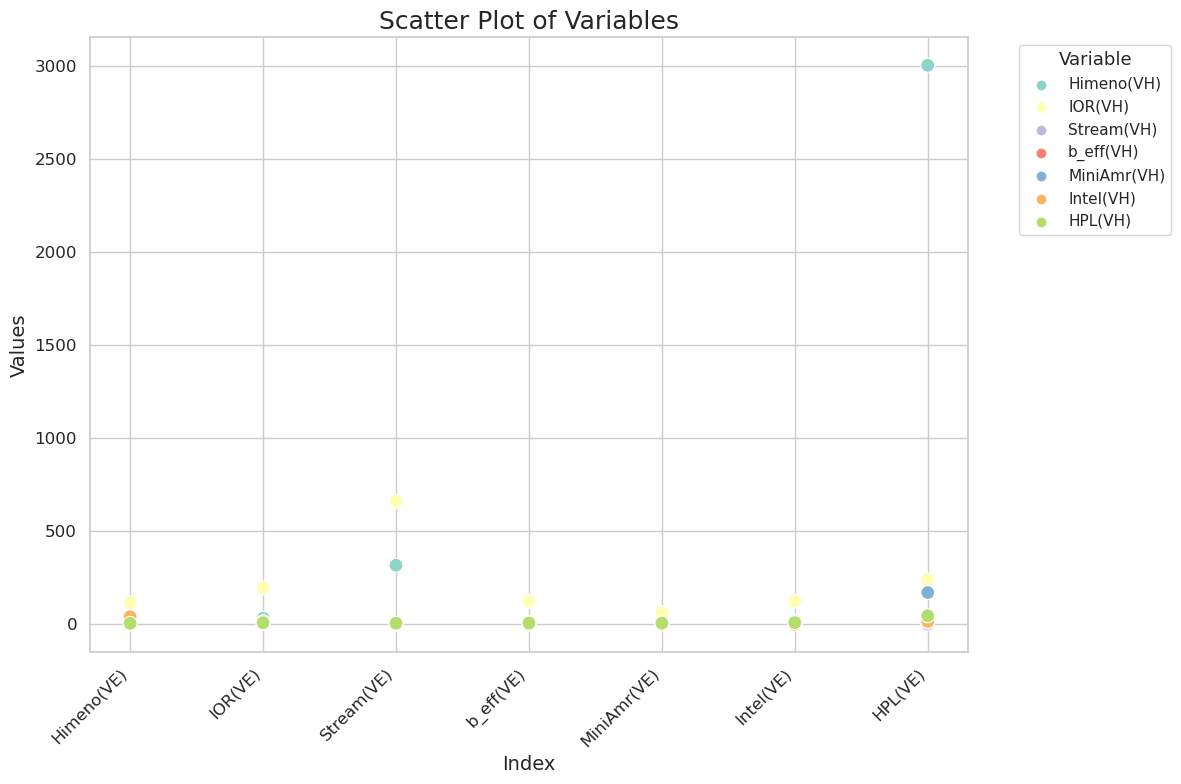

In [30]:
# Melt the dataframe to long format
df_melted = df.reset_index().melt(id_vars='index', var_name='Variable', value_name='Value')

# Set style
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x='index', y='Value', hue='Variable', data=df_melted, palette="Set3", s=100)

# Customize labels and title
plt.title('Scatter Plot of Variables', fontsize=18)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Variable', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.tight_layout()

# Show plot
plt.show()